In [ ]:
#Importing the packages
from keras.datasets import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
#Loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#Display the shape of data
print("Training images : ",(x_train.shape))
print("Testing images : ",(x_test.shape))

Training images :  (60000, 28, 28)
Testing images :  (10000, 28, 28)


<Axes: ylabel='count'>

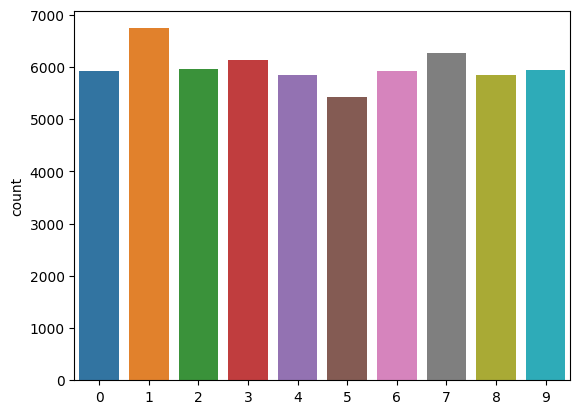

In [ ]:
#Counts of each digit present in our training dataset
sns.countplot(x=y_train)

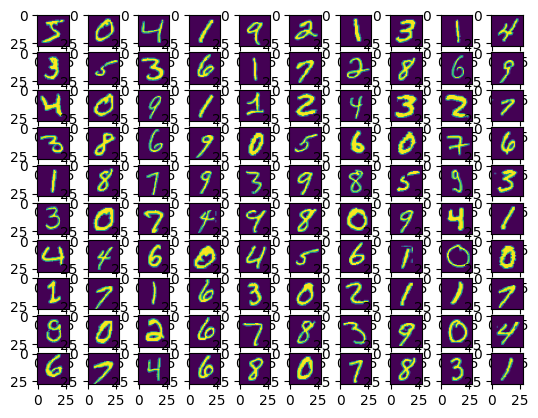

In [ ]:
#Visualizing the data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k])
        k += 1
plt.show()

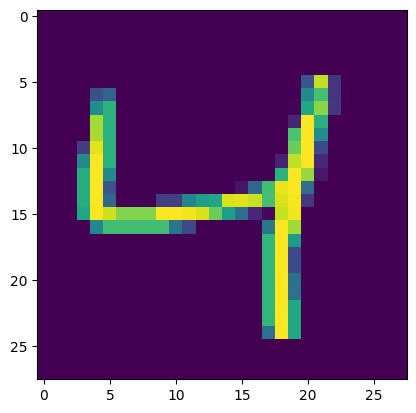

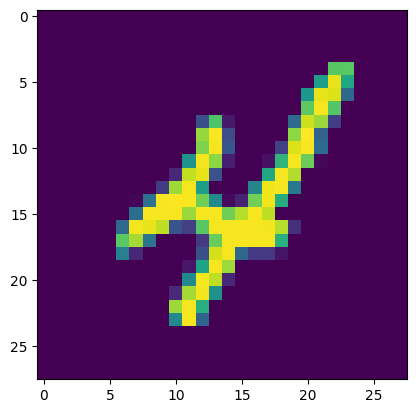

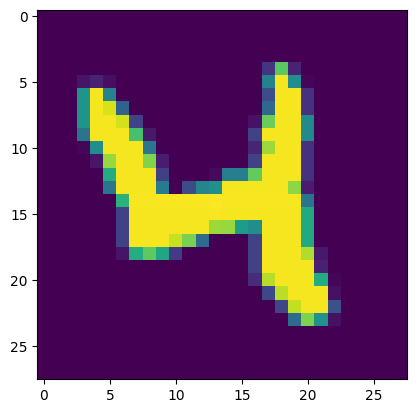

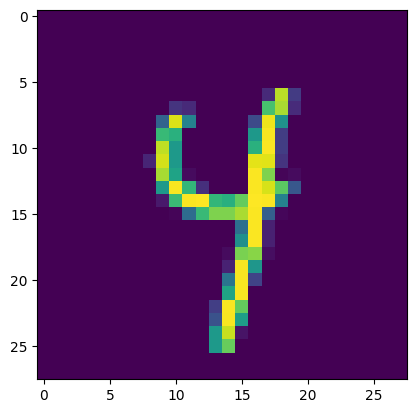

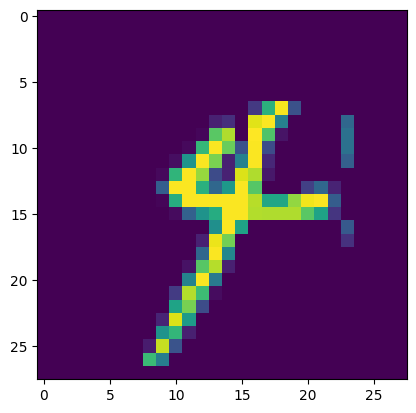

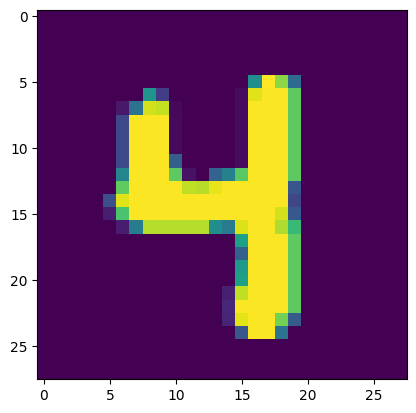

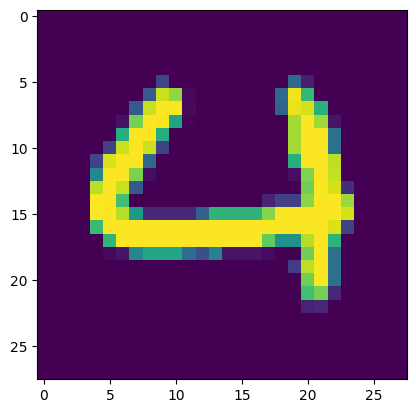

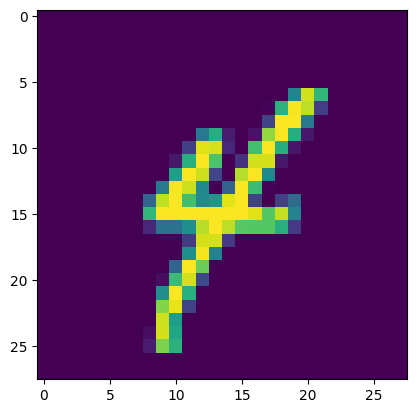

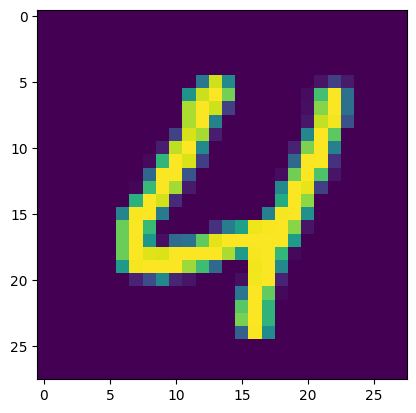

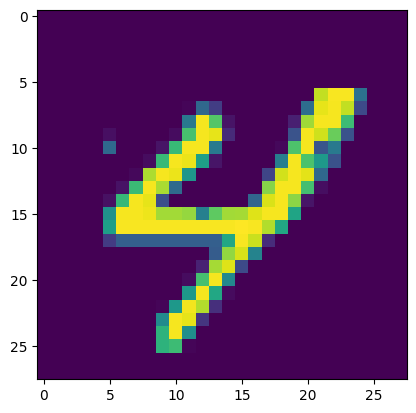

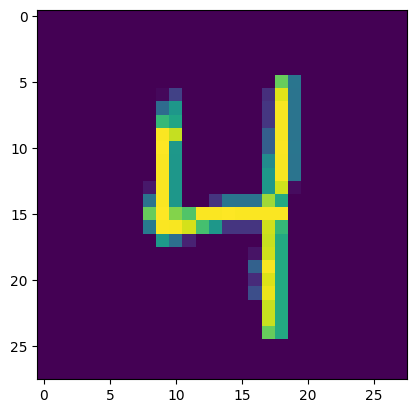

In [ ]:
for i in range(100):
  if y_train[i] == 4:
    plt.imshow(x_train[i])
    plt.show()

In [ ]:
#Converting to grayscale
x_train = x_train/255
x_test = x_test/255

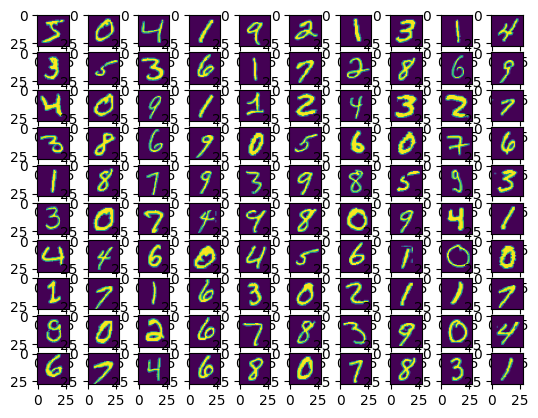

In [ ]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k])
        k += 1
plt.show()

In [ ]:
INPUT_SHAPE = (28,28,1)
BATCH_SIZE = 32
EPOCHS = 10
VERBOSE = 2

In [ ]:
model = tf.keras.Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_9 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model_history=model.fit(x_train, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
1313/1313 - 45s - loss: 0.9161 - accuracy: 0.6842 - val_loss: 0.2582 - val_accuracy: 0.9208 - 45s/epoch - 34ms/step
Epoch 2/10
1313/1313 - 43s - loss: 0.2794 - accuracy: 0.9150 - val_loss: 0.1550 - val_accuracy: 0.9523 - 43s/epoch - 33ms/step
Epoch 3/10
1313/1313 - 47s - loss: 0.1858 - accuracy: 0.9423 - val_loss: 0.1194 - val_accuracy: 0.9616 - 47s/epoch - 36ms/step
Epoch 4/10
1313/1313 - 43s - loss: 0.1472 - accuracy: 0.9557 - val_loss: 0.0974 - val_accuracy: 0.9702 - 43s/epoch - 33ms/step
Epoch 5/10
1313/1313 - 43s - loss: 0.1252 - accuracy: 0.9625 - val_loss: 0.0939 - val_accuracy: 0.9704 - 43s/epoch - 33ms/step
Epoch 6/10
1313/1313 - 42s - loss: 0.1118 - accuracy: 0.9659 - val_loss: 0.0878 - val_accuracy: 0.9728 - 42s/epoch - 32ms/step
Epoch 7/10
1313/1313 - 43s - loss: 0.1028 - accuracy: 0.9702 - val_loss: 0.0884 - val_accuracy: 0.9735 - 43s/epoch - 33ms/step
Epoch 8/10
1313/1313 - 44s - loss: 0.0945 - accuracy: 0.9716 - val_loss: 0.0818 - val_accuracy: 0.9747 - 44s/ep

In [ ]:
score = model.evaluate(x_test, y_test)
print('loss=', score[0])
print('accuracy=', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 2.3011 - accuracy: 0.1135
loss= 2.3010635375976562
accuracy= 0.11349999904632568
